In [1]:
import dowhy
from dowhy import CausalModel
from IPython.display import Image, display
import pandas as pd

# a utility function to parse the .gml file to string
def gml_to_string(file):
    gml_str = ''
    with open(file, 'r') as file:
        for line in file:
            gml_str += line.rstrip()
    return gml_str


def dowhy_backdoor(file):

    # creating arbitrary data
    df = pd.read_stata("data/close_college.dta")

    gml_graph = gml_to_string(file)
    # With GML string
    model=CausalModel(
        data = df,
        treatment='educ',
        outcome='lwage',
        graph=gml_graph
    )

    # identified_estimand = model.identify_effect()
    # print(identified_estimand)
    return model
# model = dowhy_backdoor('graph_files/dag1.gml')


c:\Users\femke\anaconda3\envs\causal_data_science_env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
import os
def prove_causality(file):
    model = dowhy_backdoor(file)
    identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
    adjustment_set = identified_estimand.get_backdoor_variables()
    causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression")
    
    return adjustment_set, causal_estimate.value


def get_causal_df_for_all_DAGs(folder):
    files = os.listdir(folder)

    causal_df = pd.DataFrame(columns=['DAG', 'estimate', 'adjustment_set'])
    
    for file in files:
        adj_set, estimate = prove_causality(f'{folder}/{file}')
        causal_df.loc[len(causal_df)] = {'DAG':file, 'estimate': estimate, 'adjustment_set':adj_set}

    return causal_df


#### PC with prior knowledge CPDAG

,DAG,estimate,adjustment_set
0,dag1.gml,0.078918,"[exper, nearc4, black]"
1,dag10.gml,0.074561,"[exper, nearc4, black]"
2,dag2.gml,0.078918,"[exper, nearc4, black]"
3,dag3.gml,0.078918,"[exper, nearc4, black]"
4,dag4.gml,0.078918,"[exper, nearc4, black]"
5,dag5.gml,0.078918,"[exper, nearc4, black]"
6,dag6.gml,0.077130,"[exper, nearc4, black]"
7,dag7.gml,0.075967,"[exper, nearc4, black]"
8,dag8.gml,0.075967,"[exper, nearc4, black]"
9,dag9.gml,0.075967,"[exper, nearc4, black]"


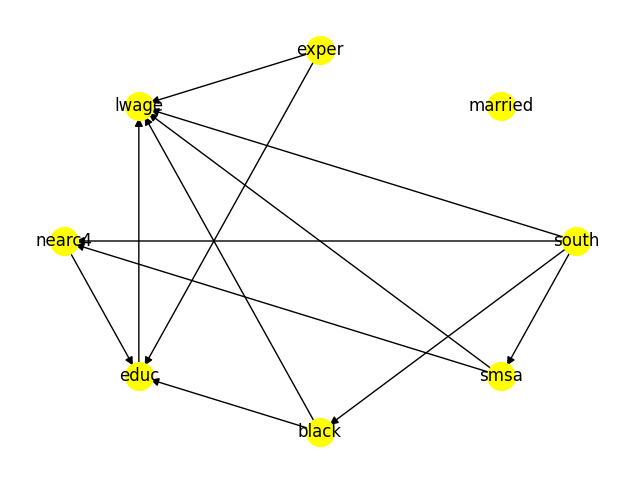

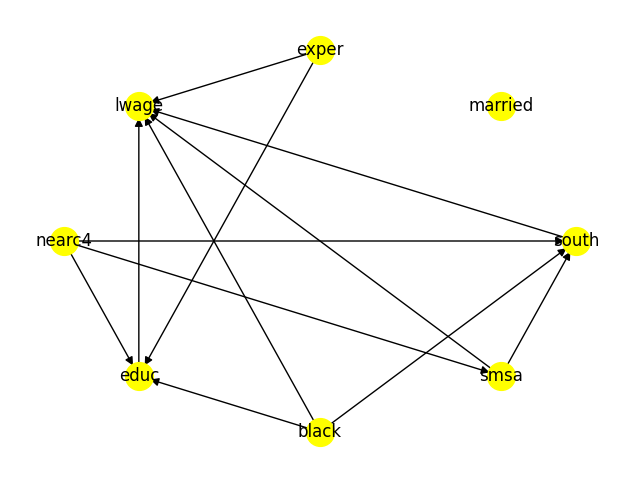

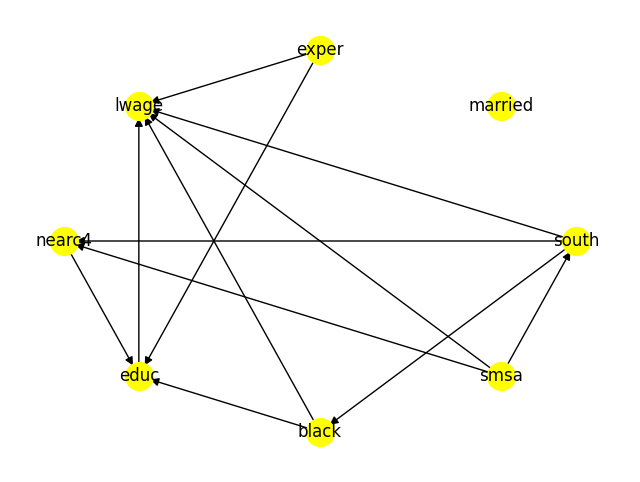

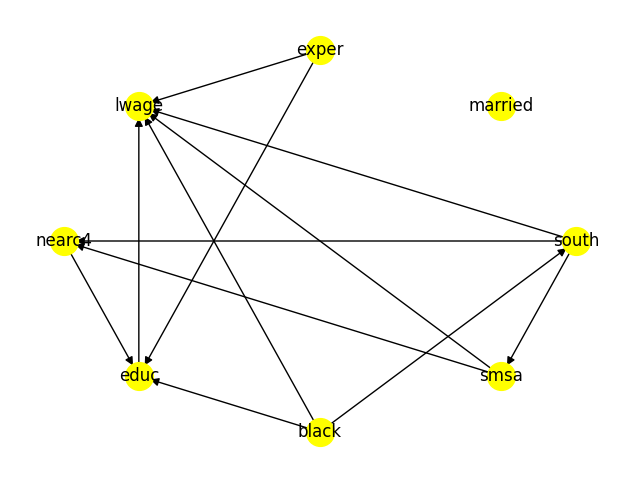

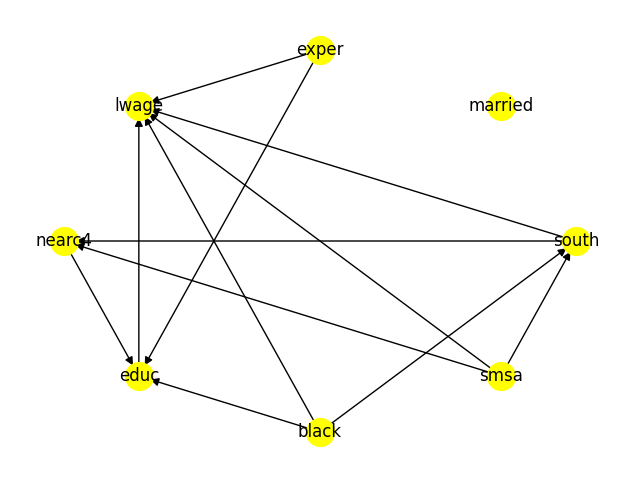

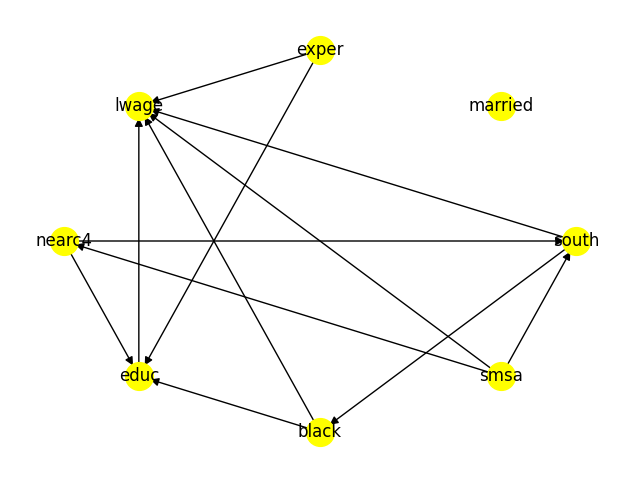

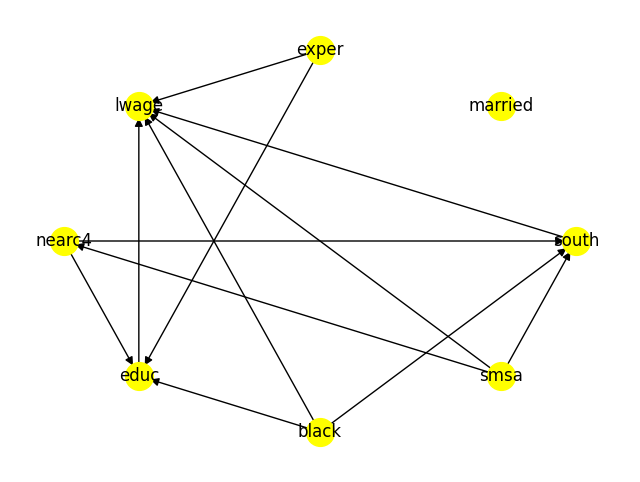

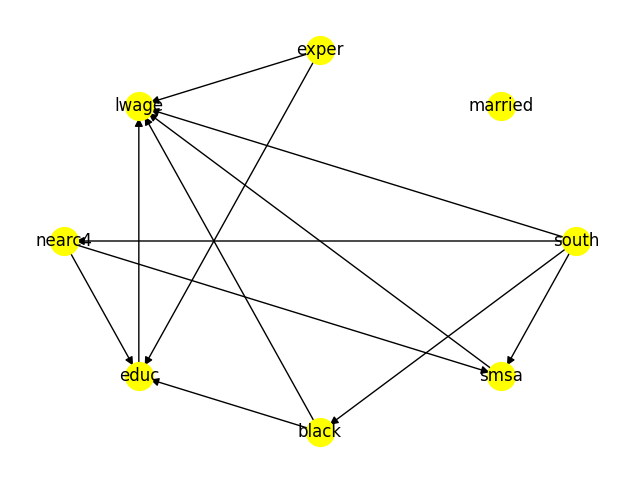

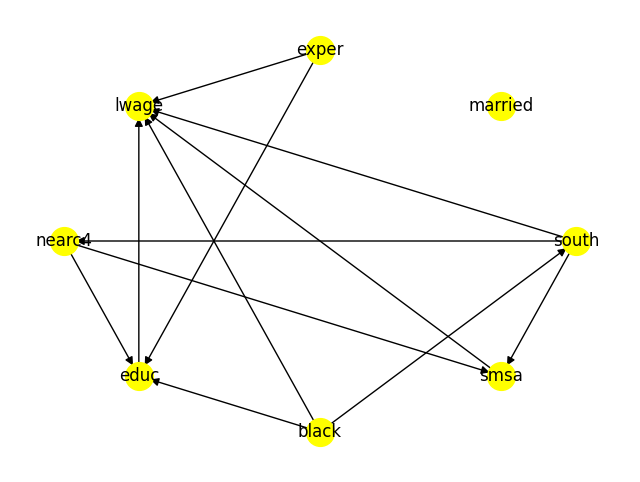

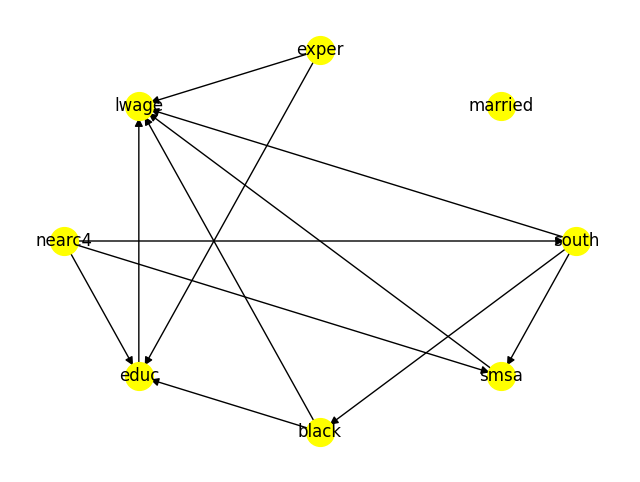

In [8]:
get_causal_df_for_all_DAGs("graph_files/PC_CPDAG_graphs")

### PC without prior knowledge CPDAG

In [4]:
get_causal_df_for_all_DAGs("graph_files/PC_withoutPK_CPDAG_graphs")

,DAG,estimate,adjustment_set
0,dag1.gml,0.078918,"[exper, nearc4, black]"
1,dag10.gml,0.074561,"[exper, nearc4, black]"
2,dag2.gml,0.078918,"[exper, nearc4, black]"
3,dag3.gml,0.078918,"[exper, nearc4, black]"
4,dag4.gml,0.078918,"[exper, nearc4, black]"
5,dag5.gml,0.078918,"[exper, nearc4, black]"
6,dag6.gml,0.077130,"[exper, nearc4, black]"
7,dag7.gml,0.075967,"[exper, nearc4, black]"
8,dag8.gml,0.075967,"[exper, nearc4, black]"
9,dag9.gml,0.075967,"[exper, nearc4, black]"
